In [19]:
#라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("diabetes_feature.csv")
df.shape

(768, 16)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


In [4]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan','low_glu_insulin']]
X.shape

(768, 9)

In [5]:
y = df['Outcome']
y.shape

(768,)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
X_train.shape, y_train.shape

((614, 9), (614,))

In [8]:
X_test.shape, y_test.shape

((154, 9), (154,))

## 학습과 예측하기 - Decision Tree

In [9]:
# from sklearn.tree import DecisionTreeClassifier #Classification 문제이기 때문에 

# model = DecisionTreeClassifier(random_state=42)
# model

In [10]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(random_state=42)
# model

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

In [12]:
#학습
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [13]:
#예측을 하고 결과를 y_predict에 담는다.
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0], dtype=int64)

## 정확도(Accuracy) 측정하기

In [14]:
(y_predict != y_test).sum()

24

In [15]:
#accurcy score를 구한다.
from sklearn.metrics import accuracy_score
 
accuracy_score(y_test, y_predict) * 100

84.4155844155844

In [16]:
model.feature_importances_

array([1.06409948e-01, 7.04053663e-03, 6.57236021e-02, 3.73742490e-02,
       2.62954875e-02, 9.47259928e-02, 1.56708089e-04, 6.62273475e-01,
       0.00000000e+00])

In [17]:
feature_names = X_train.columns.tolist()

<AxesSubplot:>

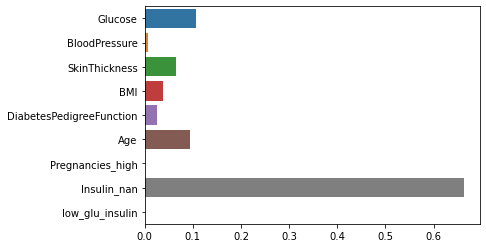

In [18]:
sns.barplot(x=model.feature_importances_, y=feature_names)

# 4.2.3

In [20]:
#라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv("diabetes_feature.csv")
df.shape #(768, 16)
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan','low_glu_insulin']]
y = df['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators = [DecisionTreeClassifier(random_state=42),
              RandomForestClassifier(random_state=42),
              GradientBoostingClassifier(random_state=42)]
estimators

[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42)]

In [26]:
max_depth = np.random.randint(2,20,10) #2부터 20까지 랜덤 10개
max_depth

array([ 8, 12, 11, 16,  4,  2, 18, 18, 10,  6])

In [29]:
max_features = np.random.uniform(0.3, 1.0, 10) #30%에서 100%까지 10개
max_features

array([0.61202993, 0.86275726, 0.37579499, 0.93476247, 0.96029133,
       0.61941494, 0.47230252, 0.49169204, 0.76726785, 0.99155995])

In [31]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"max_depth":max_depth, 
                      "max_features":max_features}
clf = RandomizedSearchCV(estimator, 
                         param_distributions, 
                         n_iter=10, 
                         scoring = "accuracy",
                         n_jobs = -1,
                         cv = 5, 
                         verbose = 2)
clf

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 8, 12, 11, 16,  4,  2, 18, 18, 10,  6]),
                                        'max_features': array([0.61202993, 0.86275726, 0.37579499, 0.93476247, 0.96029133,
       0.61941494, 0.47230252, 0.49169204, 0.76726785, 0.99155995])},
                   scoring='accuracy', verbose=2)

In [32]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:   10.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.2s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 8, 12, 11, 16,  4,  2, 18, 18, 10,  6]),
                                        'max_features': array([0.61202993, 0.86275726, 0.37579499, 0.93476247, 0.96029133,
       0.61941494, 0.47230252, 0.49169204, 0.76726785, 0.99155995])},
                   scoring='accuracy', verbose=2)

In [33]:
clf.best_params_

{'max_features': 0.7672678500940948, 'max_depth': 8}

In [34]:
clf.best_score_

0.8583100093296014

In [37]:
results = []
for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)
results

[['DecisionTreeClassifier'],
 ['RandomForestClassifier'],
 ['GradientBoostingClassifier']]

In [39]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"max_depth":max_depth, 
                      "max_features":max_features}
for estimator in estimators:
    clf = RandomizedSearchCV(estimator, 
                         param_distributions, 
                         n_iter=10, 
                         scoring = "accuracy",
                         n_jobs = -1,
                         cv = 5, 
                         verbose = 2)
clf

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 8, 12, 11, 16,  4,  2, 18, 18, 10,  6]),
                                        'max_features': array([0.61202993, 0.86275726, 0.37579499, 0.93476247, 0.96029133,
       0.61941494, 0.47230252, 0.49169204, 0.76726785, 0.99155995])},
                   scoring='accuracy', verbose=2)

In [41]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth": max_depth, 
                       "max_features": max_features}

results = []
for estimator in estimators:
    result = []
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions["n_estimators"] = np.random.randint(100, 200, 10)
        
    clf = RandomizedSearchCV(estimator, 
                       param_distributions, 
                       n_iter=100,
                       scoring="accuracy",
                       n_jobs=-1,
                       cv=5, 
                       verbose=2
                      )
    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   18.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.5min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.8min finished


In [42]:
results

[['DecisionTreeClassifier',
  {'max_features': 0.8699061300787239, 'max_depth': 4},
  0.8681060908969747,
  0.8766233766233766,
  {'mean_fit_time': array([0.020682  , 0.0299902 , 0.02232213, 0.0194768 , 0.0261313 ,
          0.0205483 , 0.02732821, 0.02512984, 0.026928  , 0.02932549,
          0.02473693, 0.02832551, 0.01921954, 0.01874337, 0.01954322,
          0.02021861, 0.02297959, 0.01521297, 0.02358594, 0.02369442,
          0.01832919, 0.0207798 , 0.01724305, 0.01598148, 0.01737576,
          0.02708712, 0.02852125, 0.02572675, 0.02277451, 0.01624365,
          0.01995559, 0.01567507, 0.01560602, 0.0178401 , 0.01861196,
          0.01704593, 0.01502986, 0.0166481 , 0.01824379, 0.01616096,
          0.01794467, 0.0159894 , 0.01996698, 0.02434659, 0.02711053,
          0.0294559 , 0.03430829, 0.03330808, 0.02936363, 0.02249589,
          0.02092772, 0.01501842, 0.01905799, 0.01418552, 0.02111082,
          0.01322031, 0.02456493, 0.02430234, 0.03066025, 0.02792645,
          0.036

In [44]:
pd.DataFrame(results, columns=["estimator", "best_params", "train_score", "test_score", "cv_result"])

,estimator,best_params,train_score,test_score,cv_result
0,DecisionTreeClassifier,"{'max_features': 0.8699061300787239, 'max_dept...",0.868106,0.876623,"{'mean_fit_time': [0.020682001113891603, 0.029..."
1,RandomForestClassifier,"{'n_estimators': 125, 'max_features': 0.756538...",0.902346,0.863636,"{'mean_fit_time': [0.8028529167175293, 0.74640..."
2,GradientBoostingClassifier,"{'n_estimators': 136, 'max_features': 0.444731...",0.905571,0.863636,"{'mean_fit_time': [3.183474636077881, 1.340911..."


In [45]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth": max_depth, 
                       "max_features": max_features}

results = []
for estimator in estimators:
    result = []        
    clf = RandomizedSearchCV(estimator, 
                       param_distributions, 
                       n_iter=10,
                       scoring="accuracy",
                       n_jobs=-1,
                       cv=5, 
                       verbose=2
                      )
    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)
results

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.9s finished


[['DecisionTreeClassifier',
  {'max_features': 0.7016976457681348, 'max_depth': 8},
  0.8583100093296014,
  0.8441558441558441,
  {'mean_fit_time': array([0.02347751, 0.02160611, 0.02112851, 0.02832184, 0.02771358,
          0.01968493, 0.02074528, 0.02312841, 0.0195168 , 0.02193942]),
   'std_fit_time': array([0.00697803, 0.00729381, 0.00400464, 0.00936989, 0.00746471,
          0.00420614, 0.00330206, 0.00950118, 0.00569273, 0.00710645]),
   'mean_score_time': array([0.01116924, 0.01462741, 0.01456099, 0.01356759, 0.01216679,
          0.01296377, 0.01396432, 0.01119843, 0.01356249, 0.01116791]),
   'std_score_time': array([0.0041631 , 0.00765212, 0.00750602, 0.00507484, 0.0056909 ,
          0.00560746, 0.00534975, 0.00265875, 0.00931592, 0.00278173]),
   'param_max_features': masked_array(data=[0.31981482905630926, 0.9620638619377597,
                      0.321938977034415, 0.31981482905630926,
                      0.7016976457681348, 0.7016976457681348,
                      0.3

In [46]:
results

[['DecisionTreeClassifier',
  {'max_features': 0.7016976457681348, 'max_depth': 8},
  0.8583100093296014,
  0.8441558441558441,
  {'mean_fit_time': array([0.02347751, 0.02160611, 0.02112851, 0.02832184, 0.02771358,
          0.01968493, 0.02074528, 0.02312841, 0.0195168 , 0.02193942]),
   'std_fit_time': array([0.00697803, 0.00729381, 0.00400464, 0.00936989, 0.00746471,
          0.00420614, 0.00330206, 0.00950118, 0.00569273, 0.00710645]),
   'mean_score_time': array([0.01116924, 0.01462741, 0.01456099, 0.01356759, 0.01216679,
          0.01296377, 0.01396432, 0.01119843, 0.01356249, 0.01116791]),
   'std_score_time': array([0.0041631 , 0.00765212, 0.00750602, 0.00507484, 0.0056909 ,
          0.00560746, 0.00534975, 0.00265875, 0.00931592, 0.00278173]),
   'param_max_features': masked_array(data=[0.31981482905630926, 0.9620638619377597,
                      0.321938977034415, 0.31981482905630926,
                      0.7016976457681348, 0.7016976457681348,
                      0.3

In [47]:
pd.DataFrame(results, columns=["estimator", "best_params", "train_score", "test_score", "cv_result"])

,estimator,best_params,train_score,test_score,cv_result
0,DecisionTreeClassifier,"{'max_features': 0.7016976457681348, 'max_dept...",0.858310,0.844156,"{'mean_fit_time': [0.023477506637573243, 0.021..."
1,RandomForestClassifier,"{'max_features': 0.9990216128981457, 'max_dept...",0.900693,0.857143,"{'mean_fit_time': [0.601423692703247, 0.705109..."
2,GradientBoostingClassifier,"{'max_features': 0.7016976457681348, 'max_dept...",0.899080,0.850649,"{'mean_fit_time': [0.22470402717590332, 1.2469..."


In [48]:
if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions["n_estimators"] = np.random.randint(100, 200, 10)

In [50]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth": max_depth, 
                       "max_features": max_features}

results = []
for estimator in estimators:
    result = []
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions["n_estimators"] = np.random.randint(100, 200, 10)
        
    clf = RandomizedSearchCV(estimator, 
                       param_distributions, 
                       n_iter=100,
                       scoring="accuracy",
                       n_jobs=-1,
                       cv=5, 
                       verbose=2
                      )
    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)
results

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:   16.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   16.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.5min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.3min finished


[['DecisionTreeClassifier',
  {'max_features': 0.44845715609194553, 'max_depth': 9},
  0.8567239770758363,
  0.7987012987012987,
  {'mean_fit_time': array([0.02592726, 0.02413831, 0.020544  , 0.01934919, 0.03351178,
          0.03290582, 0.022329  , 0.02412438, 0.02513561, 0.02791581,
          0.02812281, 0.03191576, 0.02294097, 0.02253489, 0.02592969,
          0.03092132, 0.02772584, 0.03389716, 0.02194862, 0.02333612,
          0.0241365 , 0.02133884, 0.0223455 , 0.02393708, 0.02512765,
          0.01836433, 0.02173896, 0.02134495, 0.02752142, 0.02313867,
          0.02234268, 0.02832818, 0.0243484 , 0.02432966, 0.02952375,
          0.02493405, 0.0255291 , 0.02693357, 0.02373829, 0.02373042,
          0.03132095, 0.02692604, 0.02812505, 0.02354164, 0.0257309 ,
          0.02433872, 0.02015047, 0.02313805, 0.01914783, 0.02433991,
          0.02134748, 0.0179512 , 0.02114601, 0.01755972, 0.02473807,
          0.02335215, 0.02192974, 0.01835141, 0.02034073, 0.02036314,
          0.02

In [51]:
pd.DataFrame(results, columns=["estimator", "best_params", "train_score", "test_score", "cv_result"])

,estimator,best_params,train_score,test_score,cv_result
0,DecisionTreeClassifier,"{'max_features': 0.44845715609194553, 'max_dep...",0.856724,0.798701,"{'mean_fit_time': [0.025927257537841798, 0.024..."
1,RandomForestClassifier,"{'n_estimators': 144, 'max_features': 0.938846...",0.905571,0.850649,"{'mean_fit_time': [0.9832796096801758, 0.76569..."
2,GradientBoostingClassifier,"{'n_estimators': 181, 'max_features': 0.420895...",0.905598,0.857143,"{'mean_fit_time': [2.3093898773193358, 1.26845..."


In [52]:
df = pd.DataFrame(results, 
                  columns=["estimator", "best_params", "train_score", "test_score", "cv_result"])

In [53]:
pd.DataFrame(df.loc[1, "cv_result"])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.983280,0.076976,0.085629,0.034543,150,0.762834,11,"{'n_estimators': 150, 'max_features': 0.762833...",0.861789,0.934959,0.869919,0.910569,0.926230,0.900693,0.029612,43
1,0.765694,0.084286,0.065953,0.017220,112,0.448457,16,"{'n_estimators': 112, 'max_features': 0.448457...",0.878049,0.934959,0.861789,0.894309,0.909836,0.895788,0.025316,77
2,1.333485,0.134135,0.071812,0.025762,189,0.744403,16,"{'n_estimators': 189, 'max_features': 0.744403...",0.861789,0.934959,0.869919,0.902439,0.942623,0.902346,0.032809,8
3,0.858987,0.027286,0.067802,0.019955,144,0.411376,11,"{'n_estimators': 144, 'max_features': 0.411376...",0.878049,0.934959,0.861789,0.886179,0.934426,0.899080,0.030120,48
4,1.237172,0.070064,0.085028,0.008119,177,0.448457,15,"{'n_estimators': 177, 'max_features': 0.448457...",0.861789,0.934959,0.853659,0.894309,0.918033,0.892550,0.031336,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.188618,0.027516,0.071413,0.005969,189,0.411376,19,"{'n_estimators': 189, 'max_features': 0.411376...",0.886179,0.926829,0.861789,0.894309,0.934426,0.900706,0.026781,35
96,0.822199,0.010606,0.044282,0.003432,113,0.826362,15,"{'n_estimators': 113, 'max_features': 0.826362...",0.878049,0.926829,0.853659,0.878049,0.926230,0.892563,0.029129,90
97,0.963023,0.014736,0.066823,0.019306,150,0.459623,12,"{'n_estimators': 150, 'max_features': 0.459623...",0.878049,0.934959,0.845528,0.902439,0.926230,0.897441,0.032657,69
98,1.319362,0.069527,0.068734,0.007653,189,0.762834,9,"{'n_estimators': 189, 'max_features': 0.762833...",0.853659,0.934959,0.869919,0.902439,0.942623,0.900720,0.034913,32
